# Pytorch

Pytorch framework to create a "k" layer ANN.


In [110]:
import pandas as pd
#import quandl
import datetime
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [111]:
os.getcwd()

'/home/liana/Gold-price-ANN'

In [112]:
########LOADING THE DATA########

data = pd.read_csv('Gold_Pall_Silver.csv')
#print (data)
y = data.GOLD
#print(y)
X = data.drop('GOLD', axis=1)
#X = data
#print(data)
#print(type(data))

In [134]:
#######SPLITTING THE DATA IN 80% FOR TRAINNING SET AND 20% FOR TESTING SET##########

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

print(type(X_train))


                   Date   PALL  SILVER
681   3/13/1995 0:00:00  160.0    4.62
5654   6/3/2015 0:00:00  765.0   16.60
6067  2/17/2017 0:00:00  791.0   18.00
5222  3/20/2013 0:00:00  753.0   28.90
5205  2/25/2013 0:00:00  746.0   29.17
681      385.50
5654    1190.00
6067    1241.95
5222    1607.50
5205    1586.25
Name: GOLD, dtype: float64
                    Date    PALL  SILVER
1526   7/21/1998 0:00:00   342.0    5.42
6255  11/28/2017 0:00:00  1018.0   17.07
2053   8/21/2000 0:00:00   750.0    4.83
3047    8/4/2004 0:00:00   216.0    6.62
3614  10/31/2006 0:00:00   318.0   12.08
1526     294.90
6255    1291.85
2053     274.60
3047     391.50
3614     603.75
Name: GOLD, dtype: float64
<class 'pandas.core.frame.DataFrame'>


Populating the interactive namespace from numpy and matplotlib


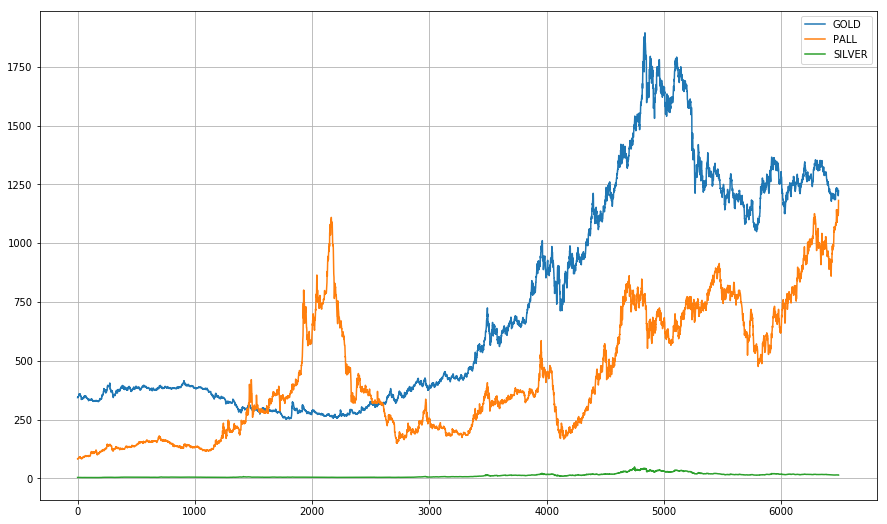

In [135]:
######PLOATING THE DATA#########

import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
data.plot(y=["GOLD", "PALL", "SILVER"], grid=True)

In [136]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from IPython.core.debugger import set_trace

In [137]:
#train_set = pd.concat([X_train, y_train], axis=1)

#test_set = pd.concat([X_test, y_test], axis=1)

#train_set = train_set.values

#test_set = test_set.values

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
train_set = list(zip(X_train, y_train))
test_set = list(zip(X_test, y_test))


batch_size = 64

train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                         batch_size=batch_size,
                                         shuffle=False)



In [138]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x):
        
        x = np.asarray(x)
        print(x)
        x = x.view(-1, 3)
        x1 = F.relu(self.fc1(x))
        x2 = F.relu(self.fc2(x1))
        x3 = self.fc3(x2)
        return F.log_softmax(x3,1)
    
    def name(self):
        return "MLP"

In [139]:
model = MLP()

optimizer = optim.SGD(model.parameters(), lr=0.01)

criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt+= (pred_label == target).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt*1.0/total_cnt))
    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(test_loader):
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
#         print(target.data)
        correct_cnt += (pred_label == target).sum().item()
        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt * 1.0 / total_cnt))

TypeError: batch must contain tensors, numbers, dicts or lists; found object